# <h1 align=center> PROYECTO INDIVIDUAL Nº2</h1>
# <h2 align=center>**Mercado bursátil**</h2>


En este NOTEBOOK encontrarán toda los pasos e instrucciones necesarias para para realizar el procesamiento de los datasets.

In [1]:
# Importar librerias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mplfinance as mpf

In [2]:
# Descargar los precios diarios de cierre de XLK para el período seleccionado
XLK = yf.download('XLK', start='2000-01-01', end='2023-03-26')

[*********************100%***********************]  1 of 1 completed


In [3]:
# Calcular los retornos diarios
XLK['daily_return']= XLK['Adj Close'].pct_change().fillna(0)

In [8]:
XLK.head(5)

,Open,High,Low,Close,Adj Close,Volume,daily_return
Date,,,,,,,
2000-01-03,55.625,55.62500,53.5000,55.43750,42.028301,938100,0.000000
2000-01-04,54.000,54.75000,52.3125,52.62500,39.896095,545500,-0.050733
2000-01-05,51.750,53.06250,50.1250,51.84375,39.303810,1906000,-0.014846
2000-01-06,51.250,52.09375,49.6250,50.12500,38.000793,1670000,-0.033152
2000-01-07,49.625,51.00000,49.1250,51.00000,38.664146,686000,0.017456


<Figure size 640x480 with 0 Axes>

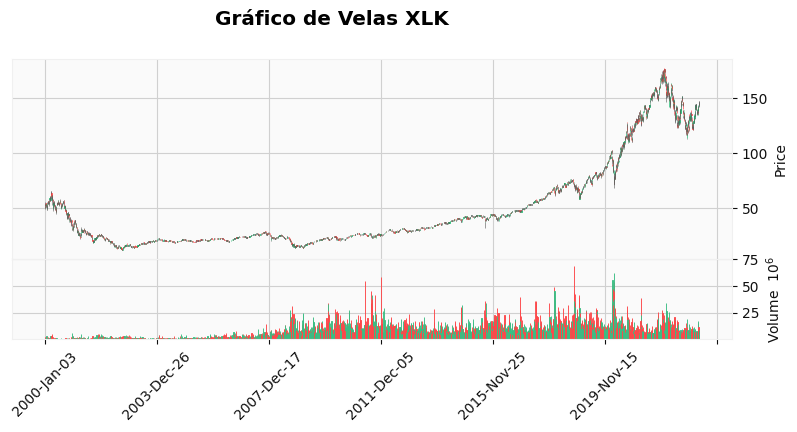

<Figure size 640x480 with 0 Axes>

In [7]:
# Ajustar el tamaño de la gráfica (ancho, alto) en pulgadas
figsize = (10, 4)

# Ajustar la ubicación de la gráfica para dejar espacio para el título fuera de la gráfica
plt.subplots_adjust(top=0.85)

# Graficar los datos como un gráfico de velas con volumen y título fuera de la gráfica
mpf.plot(XLK, type='candle', volume=True, title='Gráfico de Velas XLK', style="yahoo", warn_too_much_data=len(XLK), figsize=figsize)

# Agregar el título fuera de la gráfica
plt.suptitle('Gráfico de Velas XLK', y=0.95)

# Ajustar el diseño del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

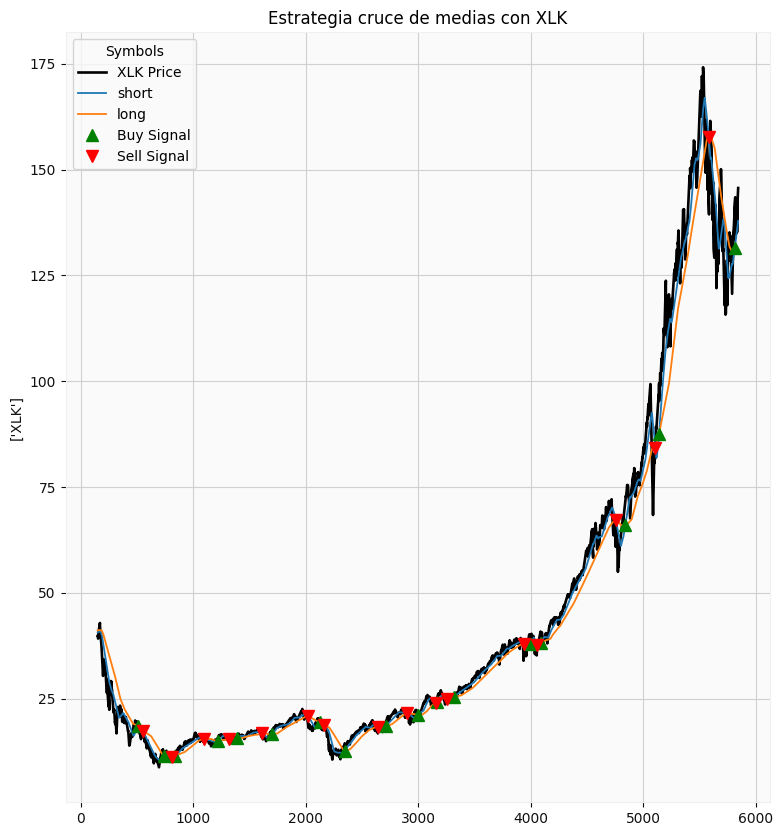

In [11]:
XLK = XLK.reset_index()
assets = ['XLK']

short_window = 50
long_window = 150

data = XLK["Adj Close"]
signal = pd.DataFrame(index=data.index)
signal['short'] = data.rolling(short_window).mean()
signal['long'] = data.rolling(long_window).mean()

signal['short'] = signal['short'].iloc[long_window:]
signal['signals'] = np.where(signal['short'] > signal['long'], 1, 0)
signal['positions'] = signal['signals'].diff()

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121, ylabel=assets)
ax1.set_title("Estrategia cruce de medias con XLK")

data.iloc[long_window:].plot(ax=ax1, color='k', lw=1.9, label='XLK Price') 

signal[['short', 'long']].plot(ax=ax1, lw=1.3)
ax1.plot(signal['short'][signal['positions'] == 1], '^', markersize=8, color='g', label='Buy Signal')
ax1.plot(signal['short'][signal['positions'] == -1], 'v', markersize=8, color='r', label='Sell Signal')

ax1.legend(title="Symbols") 

plt.show()

[*********************100%***********************]  2 of 2 completed


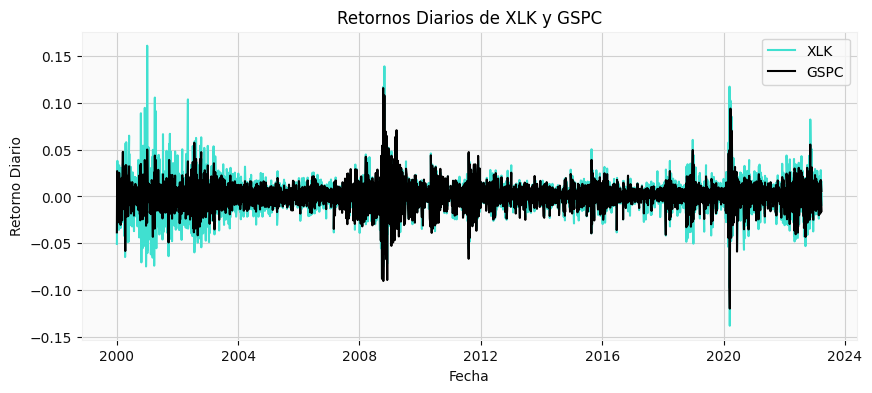

In [12]:
# Descargar los datos de XLK y GSPC
data = yf.download(['XLK', '^GSPC'], start='2000-01-01', end='2023-03-26')

# Calcular los retornos diarios
returns = data['Adj Close'].pct_change().dropna()

# Crear una figura y ejes para el gráfico
plt.figure(figsize=(10, 4))
plt.title('Retornos Diarios de XLK y GSPC')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')

# Graficar los retornos diarios de XLK y GSPC
plt.plot(returns['XLK'], label='XLK',  color = "turquoise")
plt.plot(returns['^GSPC'], label='GSPC',  color = "black")

plt.legend()
plt.show()
